In [1]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [2]:
#access and load data

In [3]:
data=pd.read_excel('training_dataset.xlsx')
table3=pd.read_excel('testing_table3.xlsx')
training_data=pd.read_excel('training_dataset_table4.xlsx')
table5=pd.read_excel('testing_table5.xlsx')

In [4]:
#preprocess data

In [5]:
data.head()

,No,LH,T,PS,PA,F
0,1.0,0.16,240.0,40.0,500.0,90.0
1,2.0,0.16,240.0,40.0,500.0,100.0
2,3.0,0.16,240.0,40.0,500.0,110.0
3,4.0,0.16,245.0,50.0,1000.0,110.0
4,5.0,0.16,245.0,50.0,1000.0,90.0


In [6]:
table3.head()

,No,LH,T,PS,PA,F
0,1.0,0.14,240.0,15.0,200.0,95.0
1,2.0,0.14,236.0,18.0,300.0,105.0
2,3.0,0.18,238.0,15.0,300.0,115.0
3,4.0,0.18,243.0,20.0,200.0,95.0
4,5.0,0.14,246.0,35.0,400.0,105.0


In [7]:
training_data.head()

,Test,Ra0,Ra0class,Ra90,Ra90class
0,1.0,10.648,Class2,12.240,Class2
1,2.0,0.916,Class1,6.464,Class1
2,3.0,1.126,Class1,9.160,Class1
3,4.0,2.428,Class1,32.994,Class2
4,5.0,1.800,Class1,5.504,Class1


In [8]:
table5.head()

,Test,Ra0,Ra0class,Ra90,Ra90class
0,1.0,1.026,Class1,4.462,Class1
1,2.0,1.178,Class1,2.656,Class1
2,3.0,2.064,Class1,3.970,Class1
3,4.0,1.126,Class1,7.192,Class1
4,5.0,1.984,Class1,9.240,Class1


In [9]:
data.describe

<bound method NDFrame.describe of       No    LH      T    PS      PA      F
0    1.0  0.16  240.0  40.0   500.0   90.0
1    2.0  0.16  240.0  40.0   500.0  100.0
2    3.0  0.16  240.0  40.0   500.0  110.0
3    4.0  0.16  245.0  50.0  1000.0  110.0
4    5.0  0.16  245.0  50.0  1000.0   90.0
5    6.0  0.16  245.0  50.0  1000.0  100.0
6    7.0  0.16  250.0  60.0  1500.0  100.0
7    8.0  0.16  250.0  60.0  1500.0  110.0
8    9.0  0.16  250.0  60.0  1500.0   90.0
9   10.0  0.20  240.0  50.0  1500.0  100.0
10  11.0  0.20  240.0  50.0  1500.0  110.0
11  12.0  0.20  240.0  50.0  1500.0   90.0
12  13.0  0.20  245.0  60.0   500.0   90.0
13  14.0  0.20  245.0  60.0   500.0  100.0
14  15.0  0.20  245.0  60.0   500.0  110.0
15  16.0  0.20  250.0  40.0  1000.0  110.0
16  17.0  0.20  250.0  40.0  1000.0   90.0
17  18.0  0.20  250.0  40.0  1000.0  100.0
18  19.0  0.24  240.0  60.0  1000.0  110.0
19  20.0  0.24  240.0  60.0  1000.0   90.0
20  21.0  0.24  240.0  60.0  1000.0  100.0
21  22.0  0.24  245.

In [10]:
table3.describe

<bound method NDFrame.describe of       No    LH      T     PS      PA      F
0    1.0  0.14  240.0   15.0   200.0   95.0
1    2.0  0.14  236.0   18.0   300.0  105.0
2    3.0  0.18  238.0   15.0   300.0  115.0
3    4.0  0.18  243.0   20.0   200.0   95.0
4    5.0  0.14  246.0   35.0   400.0  105.0
5    6.0  0.23  248.0   46.0   400.0   95.0
6    7.0  0.24  243.0   45.0   600.0  103.0
7    8.0  0.30  230.0   56.0  2000.0  100.0
8    9.0  0.30  250.0   60.0  1600.0  110.0
9   10.0  0.20  251.0   70.0  1500.0  102.0
10  11.0  0.20  249.0   85.0  1200.0  100.0
11  12.0  0.28  249.0  100.0  1200.0   98.0
12  13.0  0.28  237.0   25.0  1100.0   90.0
13  14.0  0.14  238.0   21.0   800.0  100.0
14  15.0  0.10  239.0   50.0   600.0  110.0>

In [11]:
training_data.describe

<bound method NDFrame.describe of     Test     Ra0 Ra0class    Ra90 Ra90class
0    1.0  10.648   Class2  12.240    Class2
1    2.0   0.916   Class1   6.464    Class1
2    3.0   1.126   Class1   9.160    Class1
3    4.0   2.428   Class1  32.994    Class2
4    5.0   1.800   Class1   5.504    Class1
5    6.0   8.814   Class2  10.922    Class1
6    7.0   4.552   Class2  23.650    Class2
7    8.0   1.370   Class1  14.458    Class2
8    9.0   0.954   Class1   5.414    Class1
9   10.0   1.462   Class1  23.470    Class2
10  11.0   1.666   Class1   9.050    Class1
11  12.0   1.554   Class1  10.074    Class1
12  13.0   6.258   Class2  20.088    Class2
13  14.0   7.788   Class2  15.368    Class2
14  15.0  10.172   Class2  12.560    Class2
15  16.0   9.744   Class2  10.186    Class2
16  17.0   4.696   Class2   5.462    Class1
17  18.0   5.112   Class2   5.330    Class1
18  19.0   4.274   Class2  10.668    Class1
19  20.0   6.994   Class1   8.214    Class1
20  21.0   5.868   Class2   6.056    Class

In [12]:
table5.describe

<bound method NDFrame.describe of     Test    Ra0 Ra0class    Ra90 Ra90class
0    1.0  1.026   Class1   4.462    Class1
1    2.0  1.178   Class1   2.656    Class1
2    3.0  2.064   Class1   3.970    Class1
3    4.0  1.126   Class1   7.192    Class1
4    5.0  1.984   Class1   9.240    Class1
5    6.0  1.252   Class1   8.276    Class1
6    7.0  1.026   Class1   4.462    Class1
7    8.0  1.744   Class1   7.732    Class1
8    9.0  5.906   Class2  11.408    Class1
9   10.0  3.990   Class1  12.082    Class2
10  11.0  1.182   Class1   6.392    Class1
11  12.0  1.008   Class1   6.622    Class1
12  13.0  6.466   Class2  14.002    Class2
13  14.0  0.606   Class1   6.828    Class1
14  15.0  1.846   Class1   4.758    Class1>

In [13]:
data.isnull().any()

No    False
LH    False
T     False
PS    False
PA    False
F     False
dtype: bool

In [14]:
table3.isnull().any()

No    False
LH    False
T     False
PS    False
PA    False
F     False
dtype: bool

In [15]:
training_data.isnull().any()

Test         False
Ra0          False
Ra0class     False
Ra90         False
Ra90class    False
dtype: bool

In [16]:
table5.isnull().any()

Test         False
Ra0          False
Ra0class     False
Ra90         False
Ra90class    False
dtype: bool

In [17]:
data2=pd.get_dummies(training_data)
test5=pd.get_dummies(table5)
test5

,Test,Ra0,Ra90,Ra0class_Class1,Ra0class_Class2,Ra90class_Class1,Ra90class_Class2
0,1.0,1.026,4.462,1,0,1,0
1,2.0,1.178,2.656,1,0,1,0
2,3.0,2.064,3.970,1,0,1,0
3,4.0,1.126,7.192,1,0,1,0
4,5.0,1.984,9.240,1,0,1,0
5,6.0,1.252,8.276,1,0,1,0
6,7.0,1.026,4.462,1,0,1,0
7,8.0,1.744,7.732,1,0,1,0
8,9.0,5.906,11.408,0,1,1,0
9,10.0,3.990,12.082,1,0,0,1


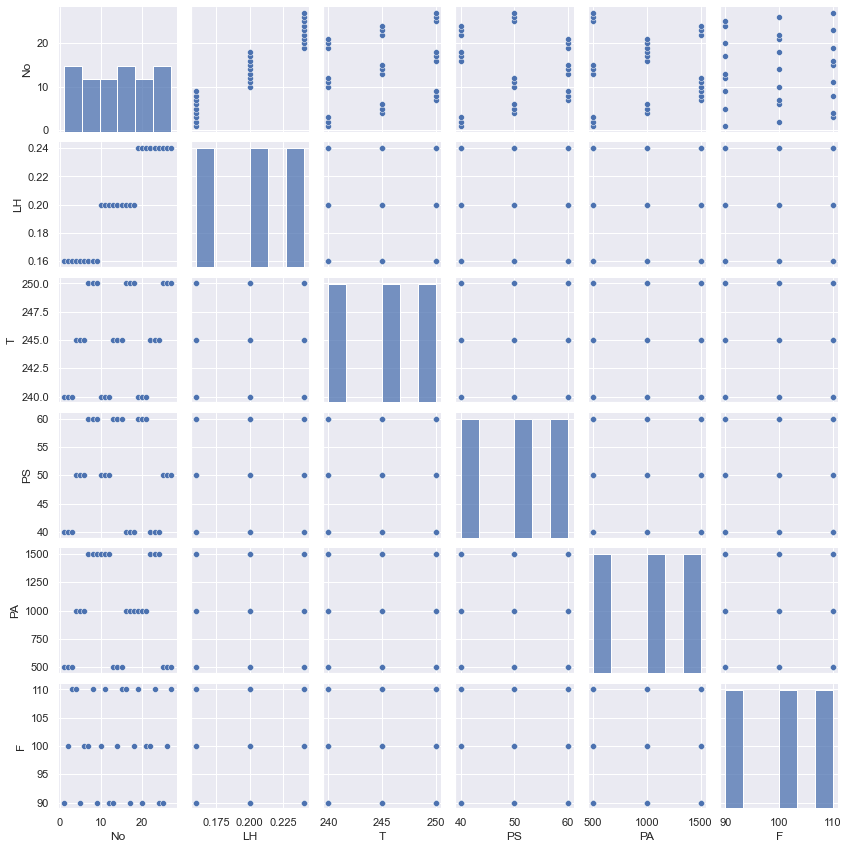

In [19]:
sns.set()
sns.pairplot(data,height = 2, kind='scatter') 
plt.show()

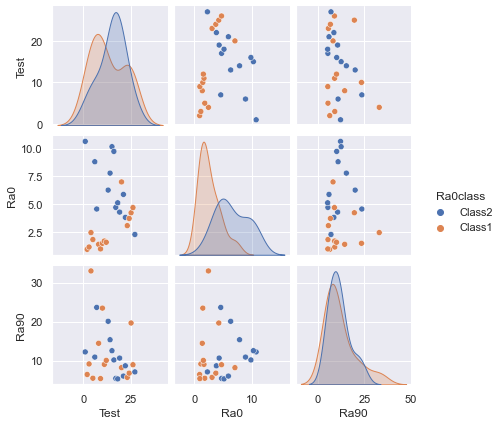

In [20]:
sns.set()
sns.pairplot(training_data,hue='Ra0class', height = 2, kind='scatter') 
plt.show()

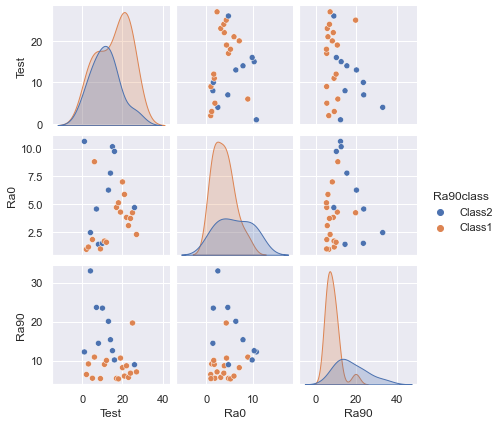

In [21]:
sns.set()
sns.pairplot(training_data,hue='Ra90class', height = 2, kind='scatter') 
plt.show()

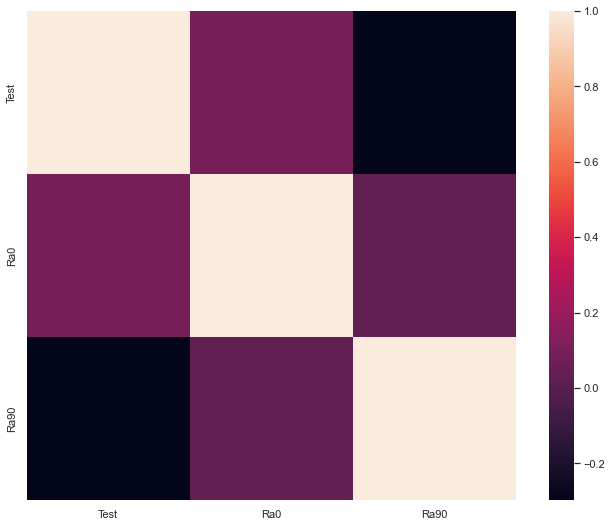

In [22]:
corrmat = training_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

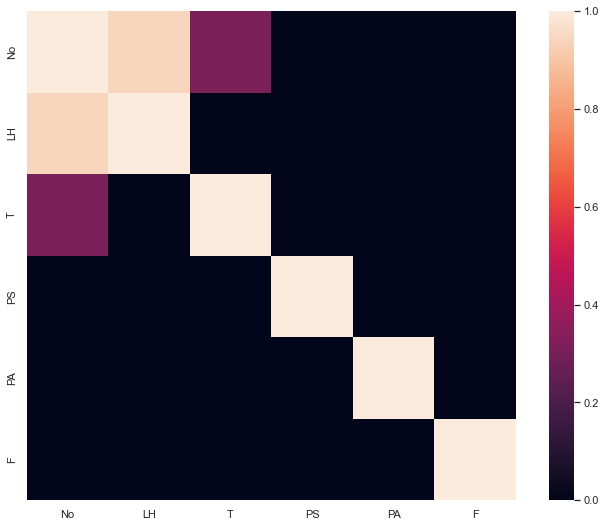

In [23]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

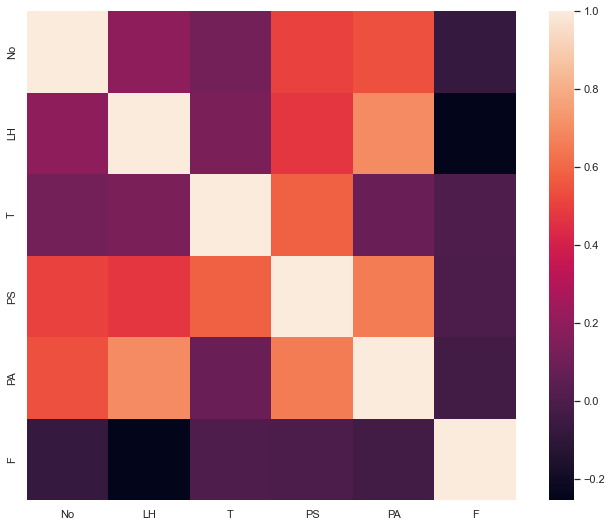

In [24]:
corrmat = table3.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

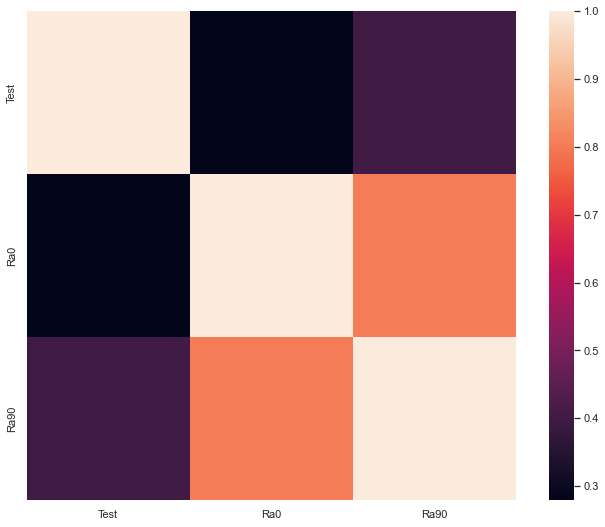

In [25]:
corrmat = table5.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

In [26]:
#train model

In [27]:
feature=['PS','PA']
features=data[feature].values
Ra=['Ra0','Ra90']
Ra=table5[Ra].values
Ra0class=['Ra0class_Class1','Ra0class_Class2']
Ra0classes=test5[Ra0class].values

In [28]:
test_no=table3['No'].values
class_name=data.No.astype('str')

In [29]:
variable=['LH','T','F']
variables=data[variable].values

In [64]:
X=features
Y=data.No

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
max_depth=2
criterion = 5
min_samples_leaf = 4
max_leaf_nodes = 8

In [67]:
tree_clf = DecisionTreeClassifier(max_depth=max_depth)

In [68]:
tree_clf = tree_clf.fit(X, Y)

In [69]:
tree_clf.predict([[6, 10]])

array([1.])

In [70]:
from sklearn.tree import plot_tree

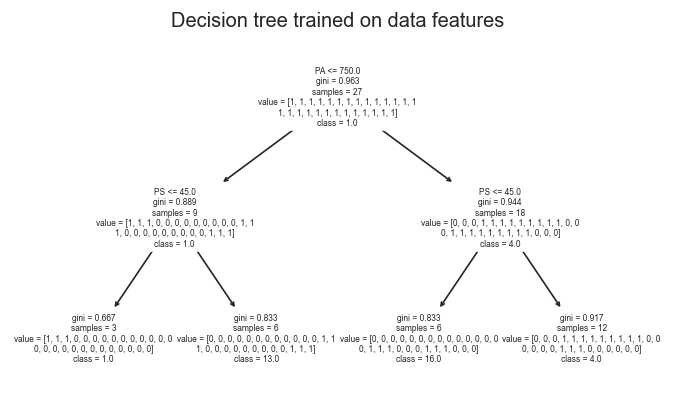

In [71]:
fig_plottree, axes_plottree = plt.subplots(nrows=1, ncols=1, figsize=(7,4), dpi=120)
plot_tree(tree_clf, 
          feature_names=feature, 
          class_names=class_name, 
          filled=True)
axes_plottree.set_title("Decision tree trained on data features")
fig_plottree.savefig('tree.png')

In [72]:
from sklearn.tree import export_text

In [73]:
tree_rules = export_text(tree_clf,feature_names = feature)
print(tree_rules)

|--- PA <= 750.00
|   |--- PS <= 45.00
|   |   |--- class: 1.0
|   |--- PS >  45.00
|   |   |--- class: 13.0
|--- PA >  750.00
|   |--- PS <= 45.00
|   |   |--- class: 16.0
|   |--- PS >  45.00
|   |   |--- class: 4.0



In [108]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

h = abs((x_max / x_min)/100)

xx,yy= np.meshgrid(np.arange(x_min, x_max, h),
                   (np.arange(y_min, y_max, h)))
h


0.01564102564102564

In [101]:
classes=training_data.Ra0class.unique()
classes

array(['Class2', 'Class1'], dtype=object)

In [99]:
Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])

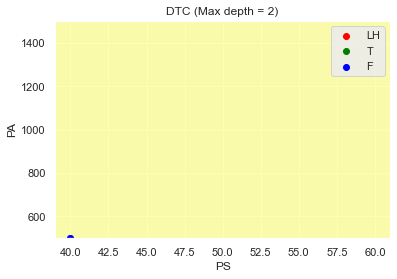

In [126]:
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], variable):
    plt.scatter(X[Y==i, 0], X[Y==i, 1], color=color, label=target)

plt.xlabel(f'{feature[0]}')
plt.ylabel(f'{feature[1]}')
plt.title(f'DTC (Max depth = {max_depth})')
plt.legend(loc='best', shadow=False, scatterpoints=1)

In [77]:
print(tree_clf.predict_proba([[8, 3.5]]))
print(tree_clf.predict([[8, 3.5]]))

[[0.33333333 0.33333333 0.33333333 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]
[1.]


In [78]:
from sklearn.model_selection import train_test_split

In [120]:
x=table3[feature].values

In [121]:
y=table3.No

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.25, 
                                                    random_state = 5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11, 2)
(11,)
(4, 2)
(4,)


In [123]:
max_depth = 2
tree_clf = DecisionTreeClassifier(max_depth=max_depth)

tree_clf.fit(x_train, y_train)

y_pred = tree_clf.predict(x_test)

In [124]:
tree_clf.score(x_test, y_test)

0.0

In [125]:
tree_clf.score(x_train, y_train)

0.2727272727272727

In [51]:
tree_clf.predict_proba(x, check_input=True)

array([[1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
        0.125, 0.125],
       [0.   , 0.   , 0.   , 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
        0.125, 0.125],
       [0.   , 0.   , 0.   , 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
        0.125, 0.125],
       [0.   , 0.   , 0.   , 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
        0.125, 0.125],
       [0.   , 0.   , 0.   , 0.125, 0.125, 0.125, 0.125, 0.1

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [53]:
labels = variable
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))

0.0
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]


/Users/dheervarsani/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dheervarsani/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       0.0
         2.0       0.00      0.00      0.00       1.0
         3.0       0.00      0.00      0.00       1.0
         4.0       0.00      0.00      0.00       0.0
         5.0       0.00      0.00      0.00       0.0
         6.0       0.00      0.00      0.00       1.0
         7.0       0.00      0.00      0.00       0.0
         8.0       0.00      0.00      0.00       1.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



/Users/dheervarsani/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dheervarsani/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dheervarsani/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users